In [14]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import warnings
import itertools
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [15]:
Airlines=pd.read_excel("Airlines+Data.xlsx",index_col=0, parse_dates=['Month'])
Airlines

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


# EDA

In [16]:
Airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [17]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [18]:
Airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [19]:
Airlines.shape

(96, 1)

In [20]:
Airlines.isnull().sum()

Passengers    0
dtype: int64

In [21]:
Airlines.duplicated()

Month
1995-01-01    False
1995-02-01    False
1995-03-01    False
1995-04-01    False
1995-05-01    False
              ...  
2002-08-01    False
2002-09-01    False
2002-10-01    False
2002-11-01    False
2002-12-01     True
Length: 96, dtype: bool

In [22]:
Airlines.dtypes

Passengers    int64
dtype: object

# Visualizations

In [23]:
Airlines = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True)
Airlines

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [24]:
Airlines.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

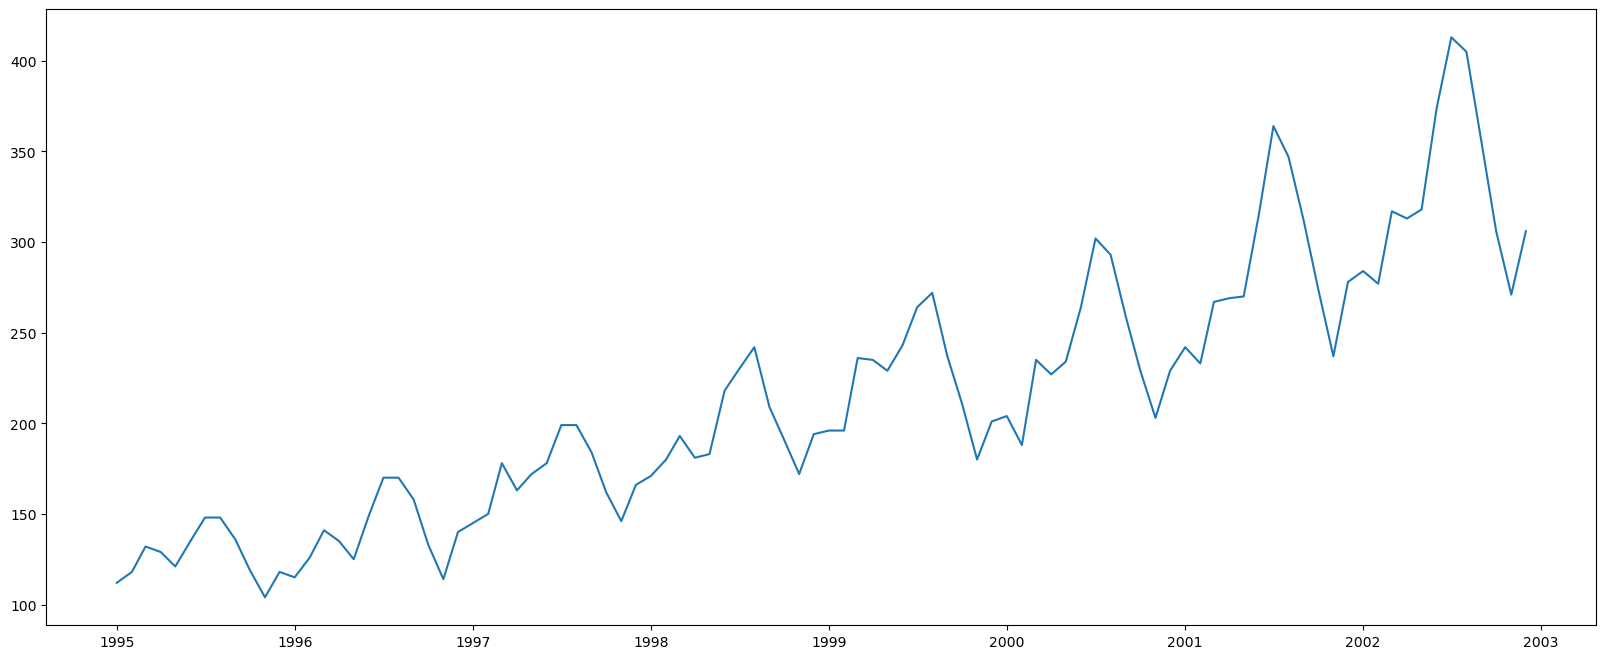

In [25]:
plt.figure(figsize = (20,8))
plt.plot(Airlines)

# Histogram and Density Plots

array([[<Axes: title={'center': 'Passengers'}>]], dtype=object)

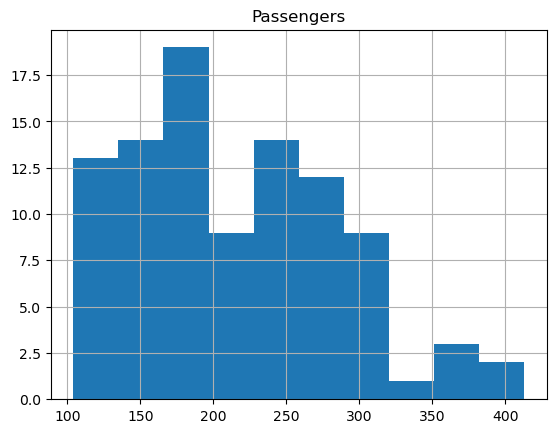

In [26]:
# create a Histogram Plot
Airlines.hist()

<Axes: ylabel='Density'>

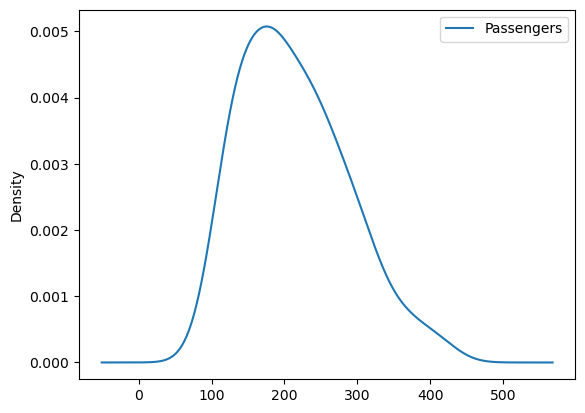

In [27]:
# create a Density Plot
Airlines.plot(kind='kde')

# Box and Whisker Plots by Interval

In [28]:
Airlines = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
Airlines

C:\Users\vinod kumar N\AppData\Local\Temp\ipykernel_12504\4129550344.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  Airlines = pd.read_excel("Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [29]:
type(Airlines)

pandas.core.series.Series

In [30]:
# Grouping by Year
groups = Airlines.groupby(pd.Grouper(freq='A'))
groups

In [31]:
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years

,1995,1996,1997,1998,1999,2000,2001,2002
0,112,115,145,171,196,204,242,284
1,118,126,150,180,196,188,233,277
2,132,141,178,193,236,235,267,317
3,129,135,163,181,235,227,269,313
4,121,125,172,183,229,234,270,318
5,135,149,178,218,243,264,315,374
6,148,170,199,230,264,302,364,413
7,148,170,199,242,272,293,347,405
8,136,158,184,209,237,259,312,355
9,119,133,162,191,211,229,274,306


<Axes: >

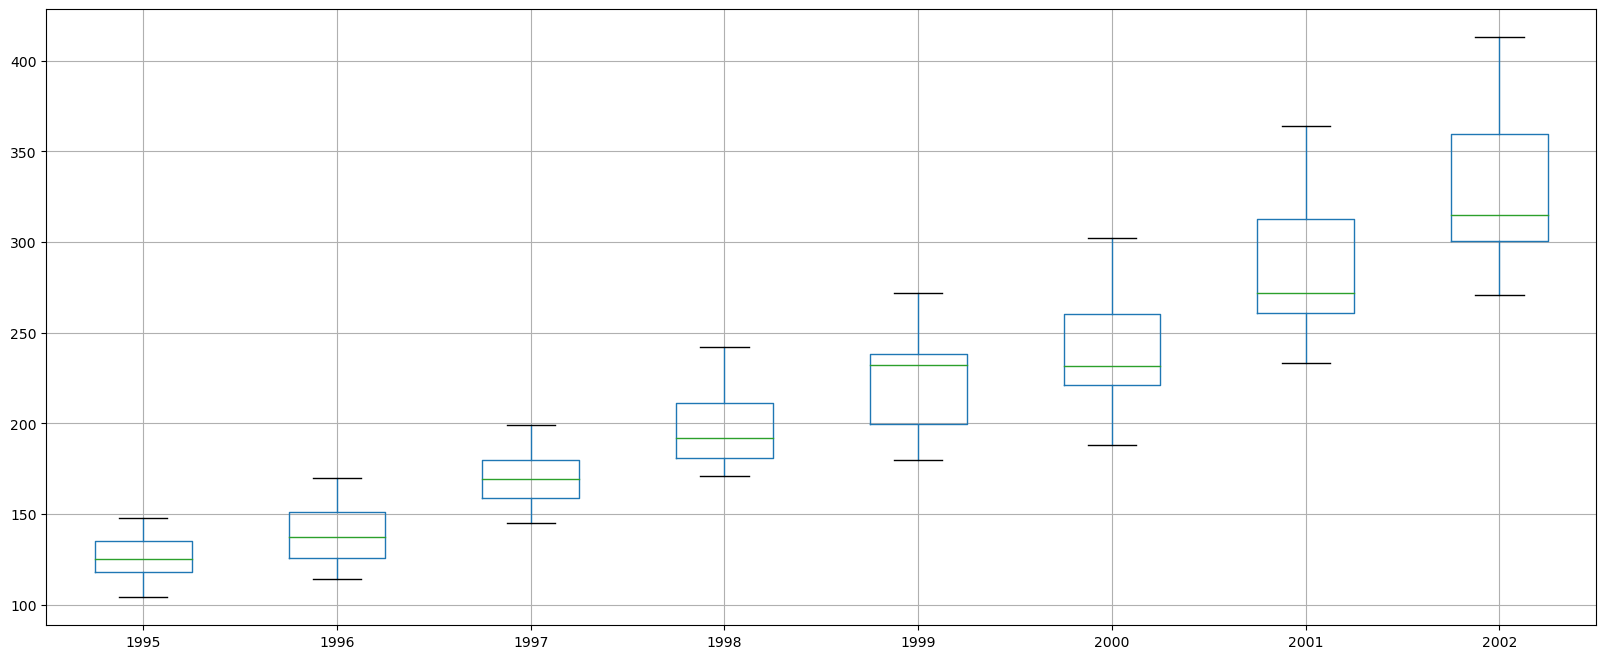

In [32]:
plt.figure(figsize = (20,8))
years.boxplot()

# Lag Plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

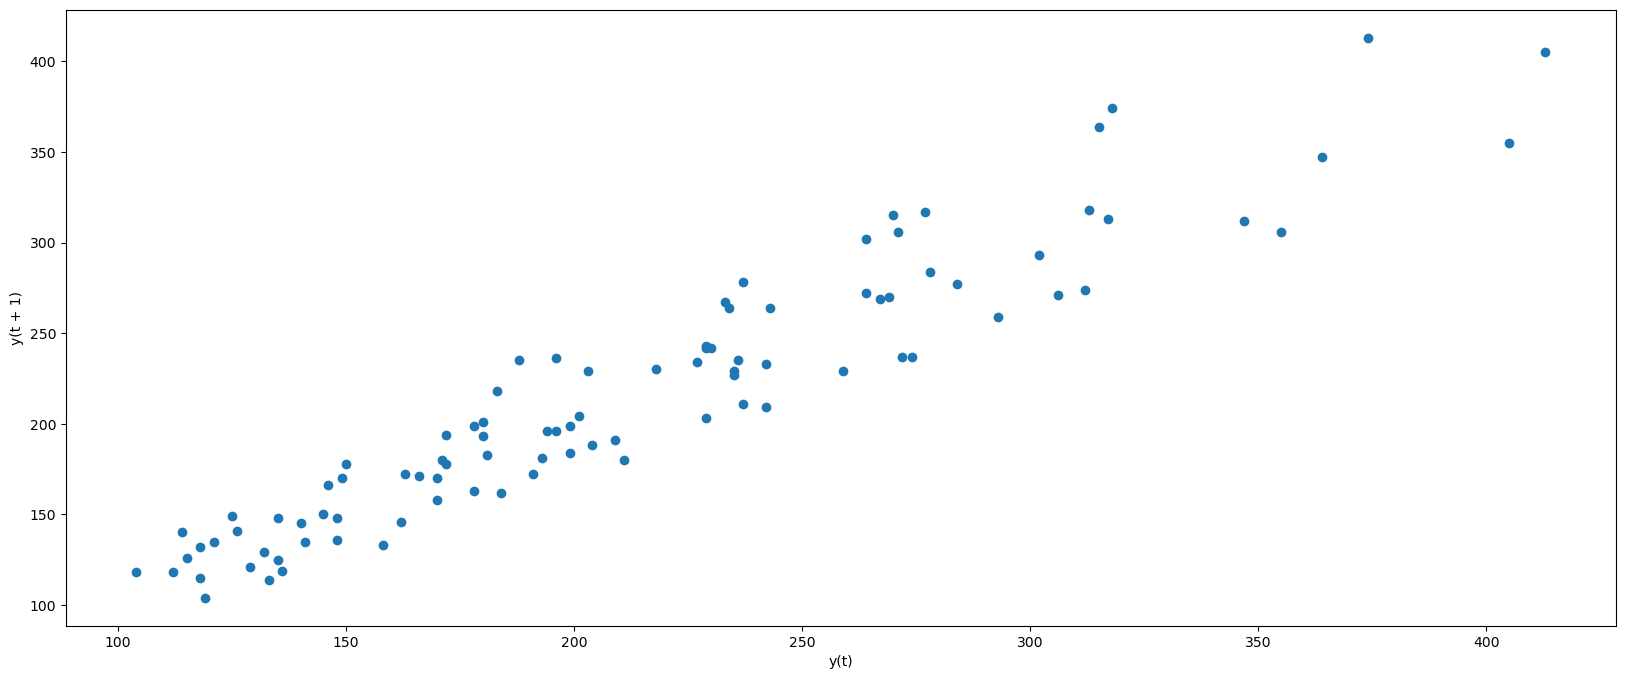

In [33]:
# create a Scatter Plot
plt.figure(figsize = (20,8))
pd.plotting.lag_plot(Airlines)

<Figure size 4000x1000 with 0 Axes>

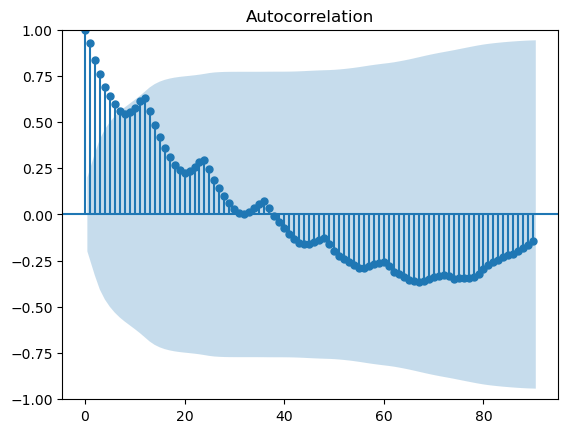

In [34]:
# create an Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize = (40,10))
plot_acf(Airlines, lags=90)
plt.show()

# Sampling and Basic Transformations 

# Upsampling Data

In [35]:
Airlines = pd.read_excel("Airlines+Data.xlsx",
                     index_col = 0,
                     header = 0,
                     parse_dates = True,
                    squeeze=True)
Airlines

C:\Users\vinod kumar N\AppData\Local\Temp\ipykernel_12504\4129550344.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  Airlines = pd.read_excel("Airlines+Data.xlsx",


Month
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2002-08-01    405
2002-09-01    355
2002-10-01    306
2002-11-01    271
2002-12-01    306
Name: Passengers, Length: 96, dtype: int64

In [36]:
Airlines.shape

(96,)

In [37]:
upsampled = Airlines.resample('D').mean()
upsampled.head(20)

Month
1995-01-01    112.0
1995-01-02      NaN
1995-01-03      NaN
1995-01-04      NaN
1995-01-05      NaN
1995-01-06      NaN
1995-01-07      NaN
1995-01-08      NaN
1995-01-09      NaN
1995-01-10      NaN
1995-01-11      NaN
1995-01-12      NaN
1995-01-13      NaN
1995-01-14      NaN
1995-01-15      NaN
1995-01-16      NaN
1995-01-17      NaN
1995-01-18      NaN
1995-01-19      NaN
1995-01-20      NaN
Freq: D, Name: Passengers, dtype: float64

In [38]:
upsampled.shape

(2892,)

# Interpolate the Missing Value

In [39]:
interpolated = upsampled.interpolate(method='linear')
interpolated.head(20)

Month
1995-01-01    112.000000
1995-01-02    112.193548
1995-01-03    112.387097
1995-01-04    112.580645
1995-01-05    112.774194
1995-01-06    112.967742
1995-01-07    113.161290
1995-01-08    113.354839
1995-01-09    113.548387
1995-01-10    113.741935
1995-01-11    113.935484
1995-01-12    114.129032
1995-01-13    114.322581
1995-01-14    114.516129
1995-01-15    114.709677
1995-01-16    114.903226
1995-01-17    115.096774
1995-01-18    115.290323
1995-01-19    115.483871
1995-01-20    115.677419
Freq: D, Name: Passengers, dtype: float64

<Axes: xlabel='Month'>

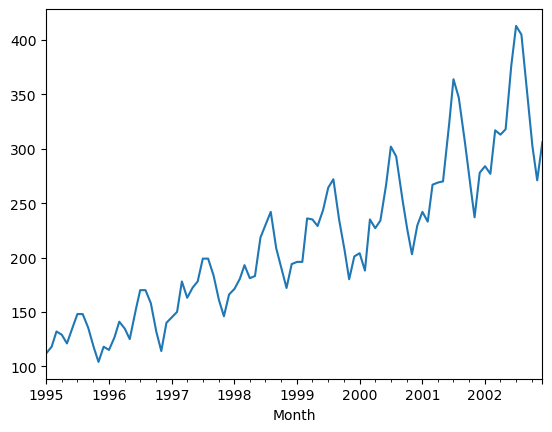

In [40]:
interpolated.plot()

<Axes: xlabel='Month'>

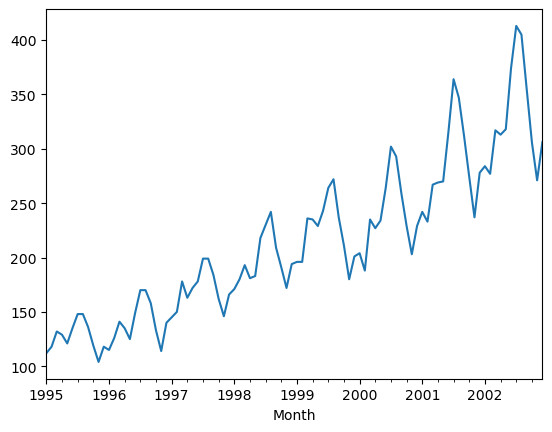

In [41]:
Airlines.plot()

# Downsampling Data

In [42]:
# downsample to Quarterly Intervals
resample = Airlines.resample('Q')
quarterly_mean_sales = resample.mean()

<Axes: xlabel='Month'>

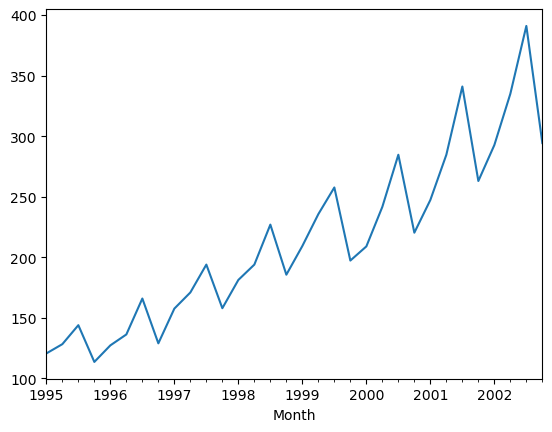

In [43]:
quarterly_mean_sales.plot()

# Tranformations¶

In [44]:
# load and plot a time series
Airlines=pd.read_excel("Airlines+Data.xlsx",index_col=0,header=0, parse_dates=True)
Airlines

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


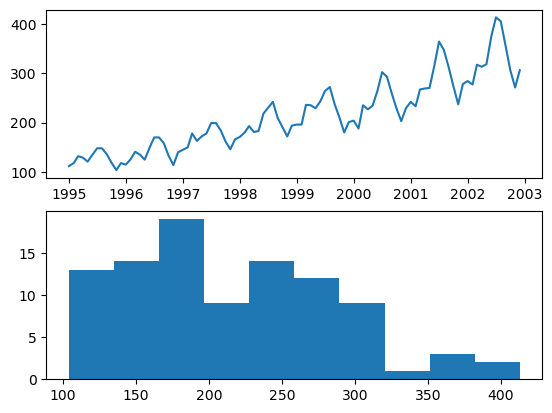

In [45]:
# line plot
plt.subplot(211)
plt.plot(Airlines)

# histogram
plt.subplot(212)
plt.hist(Airlines)

plt.show()

# Square Root Transform

In [46]:
dataframe = pd.DataFrame(np.sqrt(Airlines.values), columns = ['Passengers'])
dataframe

,Passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000
...,...
91,20.124612
92,18.841444
93,17.492856
94,16.462078


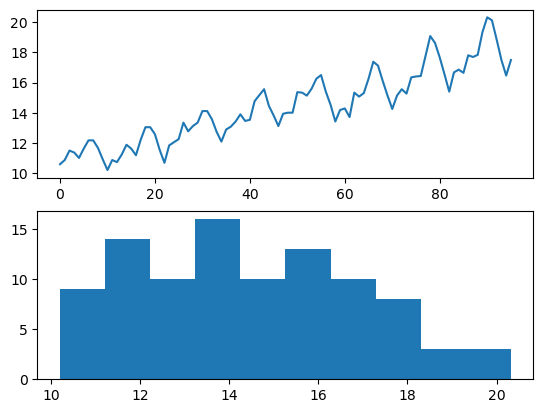

In [47]:
# line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

# Log Transform

In [48]:
dataframe = pd.DataFrame(np.log(Airlines.values), columns = ['Passengers'])
dataframe

,Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
91,6.003887
92,5.872118
93,5.723585
94,5.602119


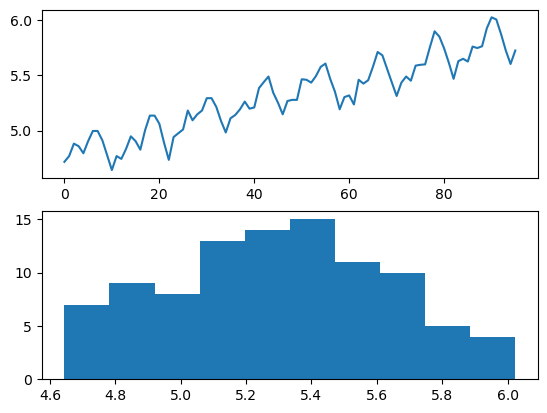

In [49]:
# Line plot
plt.subplot(211)
plt.plot(dataframe['Passengers'])

# Histogram
plt.subplot(212)
plt.hist(dataframe['Passengers'])
plt.show()

In [50]:
quarterly_mean_sales.head()

Month
1995-03-31    120.666667
1995-06-30    128.333333
1995-09-30    144.000000
1995-12-31    113.666667
1996-03-31    127.333333
Freq: Q-DEC, Name: Passengers, dtype: float64

# Forecasting - Model Based Methods

In [51]:
Airlines=pd.read_excel("Airlines+Data.xlsx")
Airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<Axes: >

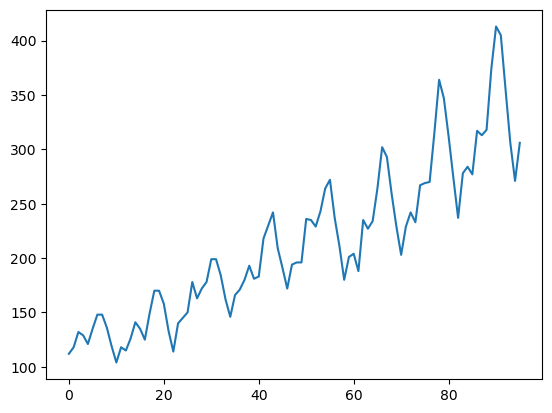

In [52]:
Airlines['Passengers'].plot()

In [53]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

Airlines["month"] = Airlines['Month'].dt.strftime("%b") # month extraction
Airlines["year"] = Airlines['Month'].dt.strftime("%Y") # year extraction
#Airlines["Day"] = Walmart.Date.dt.strftime("%d") # Day extraction
#Airlines["wkday"] = Walmart.Date.dt.strftime("%A") # weekday extraction

In [54]:
Airlines

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [55]:
heatmap_y_month = pd.pivot_table(data = Airlines,
                                 values = "Passengers",
                                 index = "year",
                                 columns = "month",
                                 aggfunc = "mean",
                                 fill_value=0)
heatmap_y_month

month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
1995,129,148,118,118,112,148,135,132,121,104,119,136
1996,135,170,140,126,115,170,149,141,125,114,133,158
1997,163,199,166,150,145,199,178,178,172,146,162,184
1998,181,242,194,180,171,230,218,193,183,172,191,209
1999,235,272,201,196,196,264,243,236,229,180,211,237
2000,227,293,229,188,204,302,264,235,234,203,229,259
2001,269,347,278,233,242,364,315,267,270,237,274,312
2002,313,405,306,277,284,413,374,317,318,271,306,355


<Axes: xlabel='month', ylabel='year'>

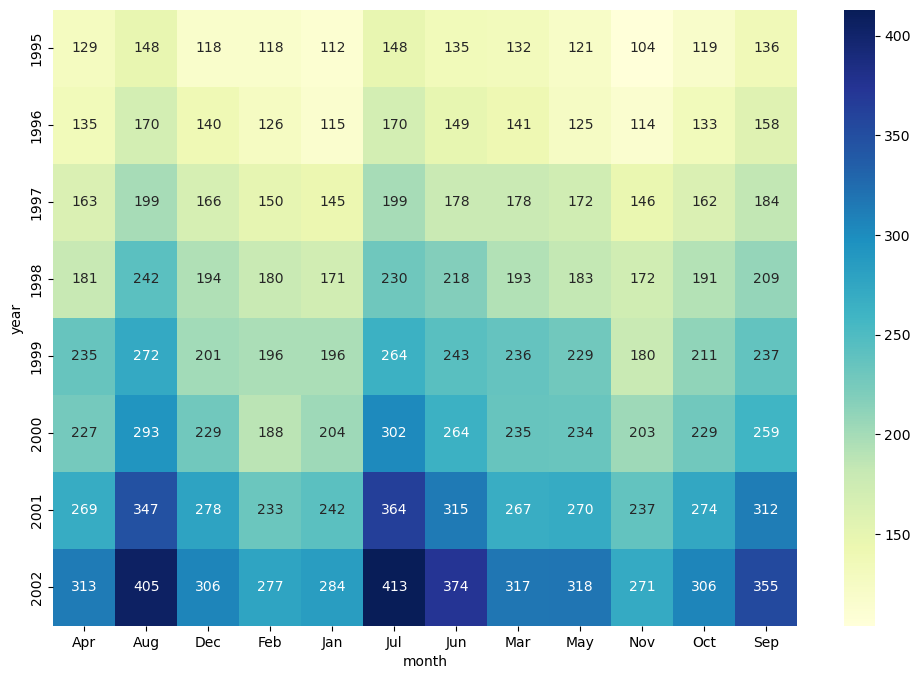

In [56]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_y_month,
            annot=True,
            fmt="g",
            cmap = 'YlGnBu') #fmt is format of the grid values

<Axes: xlabel='year', ylabel='Passengers'>

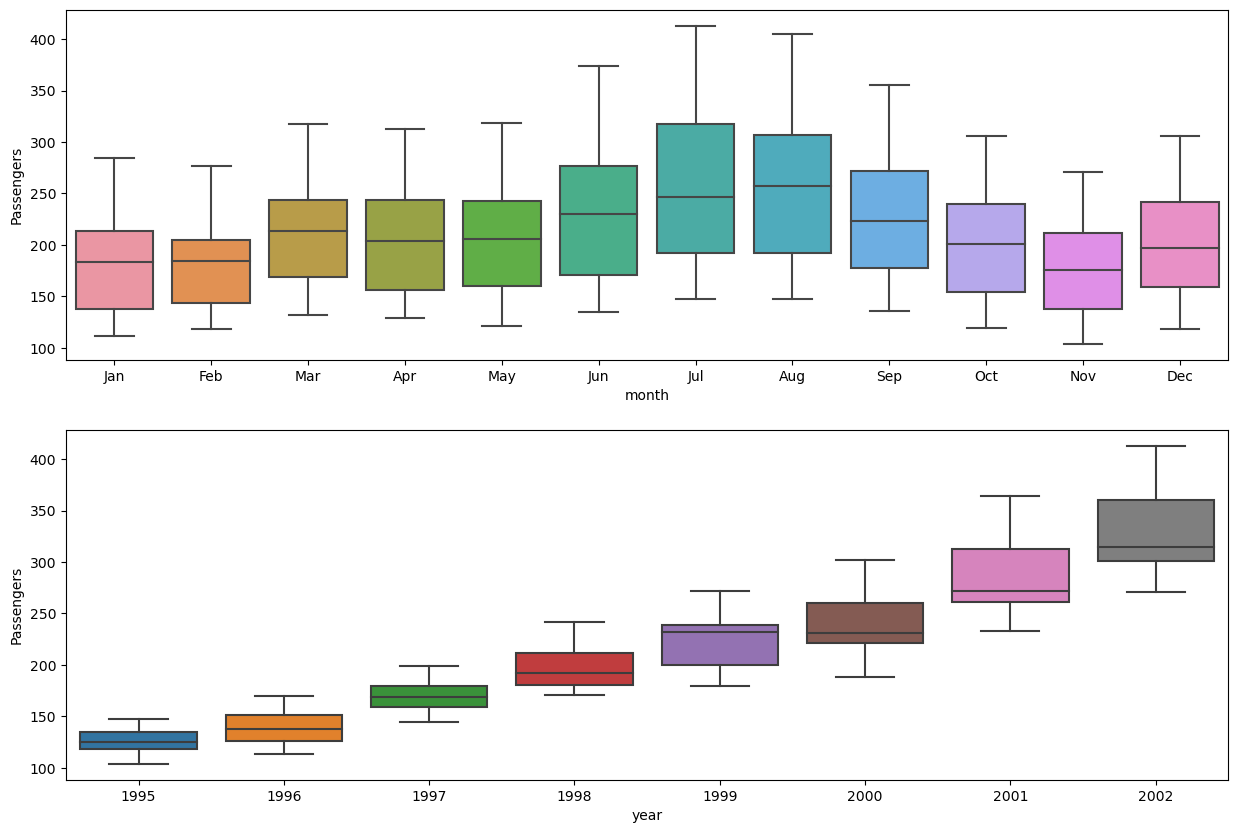

In [57]:
# Boxplot for ever
plt.figure(figsize=(15,10))

plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Airlines)

plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Airlines)

<Axes: xlabel='year', ylabel='Passengers'>

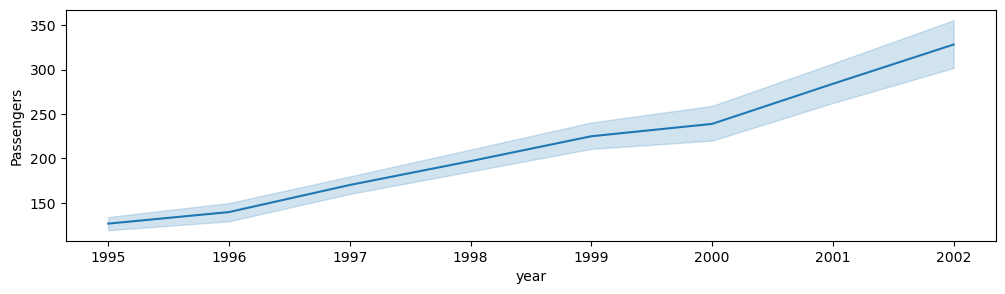

In [58]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Airlines)

# Splitting Data

In [59]:
Airlines

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995
...,...,...,...,...
91,2002-08-01,405,Aug,2002
92,2002-09-01,355,Sep,2002
93,2002-10-01,306,Oct,2002
94,2002-11-01,271,Nov,2002


In [60]:
Airlines.shape

(96, 4)

In [61]:
# Complete the dataset
Airlines['t']=np.arange(1,97)
Airlines['t_square']=np.square(Airlines.t)
Airlines['log_Passengers']=np.log(Airlines.Passengers)
Airlines2=pd.get_dummies(Airlines['month'])

In [62]:
Airlines

,Month,Passengers,month,year,t,t_square,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585
94,2002-11-01,271,Nov,2002,95,9025,5.602119


In [63]:
Airlines2

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [64]:
Airlines=pd.concat([Airlines,Airlines2],axis=1)
Airlines

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


In [65]:
# For self understanding of forecasting values data split into multiples of 12
Train = Airlines.head(84)
Test = Airlines.tail(12)

In [66]:
Train

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,80,6400,5.849325,0,1,0,0,0,0,0,0,0,0,0,0
80,2001-09-01,312,Sep,2001,81,6561,5.743003,0,0,0,0,0,0,0,0,0,0,0,1
81,2001-10-01,274,Oct,2001,82,6724,5.613128,0,0,0,0,0,0,0,0,0,0,1,0
82,2001-11-01,237,Nov,2001,83,6889,5.468060,0,0,0,0,0,0,0,0,0,1,0,0


In [67]:
Test

,Month,Passengers,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
84,2002-01-01,284,Jan,2002,85,7225,5.648974,0,0,0,0,1,0,0,0,0,0,0,0
85,2002-02-01,277,Feb,2002,86,7396,5.624018,0,0,0,1,0,0,0,0,0,0,0,0
86,2002-03-01,317,Mar,2002,87,7569,5.758902,0,0,0,0,0,0,0,1,0,0,0,0
87,2002-04-01,313,Apr,2002,88,7744,5.746203,1,0,0,0,0,0,0,0,0,0,0,0
88,2002-05-01,318,May,2002,89,7921,5.762051,0,0,0,0,0,0,0,0,1,0,0,0
89,2002-06-01,374,Jun,2002,90,8100,5.924256,0,0,0,0,0,0,1,0,0,0,0,0
90,2002-07-01,413,Jul,2002,91,8281,6.023448,0,0,0,0,0,1,0,0,0,0,0,0
91,2002-08-01,405,Aug,2002,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0


In [68]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480265

In [69]:
#Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.05736110315613

In [70]:
#Quadratic 
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

48.05188897933156

In [71]:
#Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.8197848142182

In [72]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.360817612081423

In [73]:
##Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

140.0632020470866

In [74]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

10.519172544323887

In [75]:
#Multiplicative Seasonality Quadratic 
mult_sea_Quad = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_mult_sea_quad = pd.Series(mult_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_mult_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_mult_sea_quad))**2))
rmse_mult_sea_quad

325.7312105213401

In [76]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,10.519173
4,rmse_add_sea_quad,26.360818
1,rmse_Exp,46.057361
2,rmse_Quad,48.051889
0,rmse_linear,53.199237
3,rmse_add_sea,132.819785
5,rmse_Mult_sea,140.063202


In [77]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Airlines).fit()

In [78]:
pred_new  = pd.Series(model_full.predict(Airlines))
pred_new

0     4.692963
1     4.703487
2     4.846666
3     4.813814
4     4.807291
        ...   
91    5.978339
92    5.868100
93    5.737989
94    5.607538
95    5.744085
Length: 96, dtype: float64

In [79]:
Airlines["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

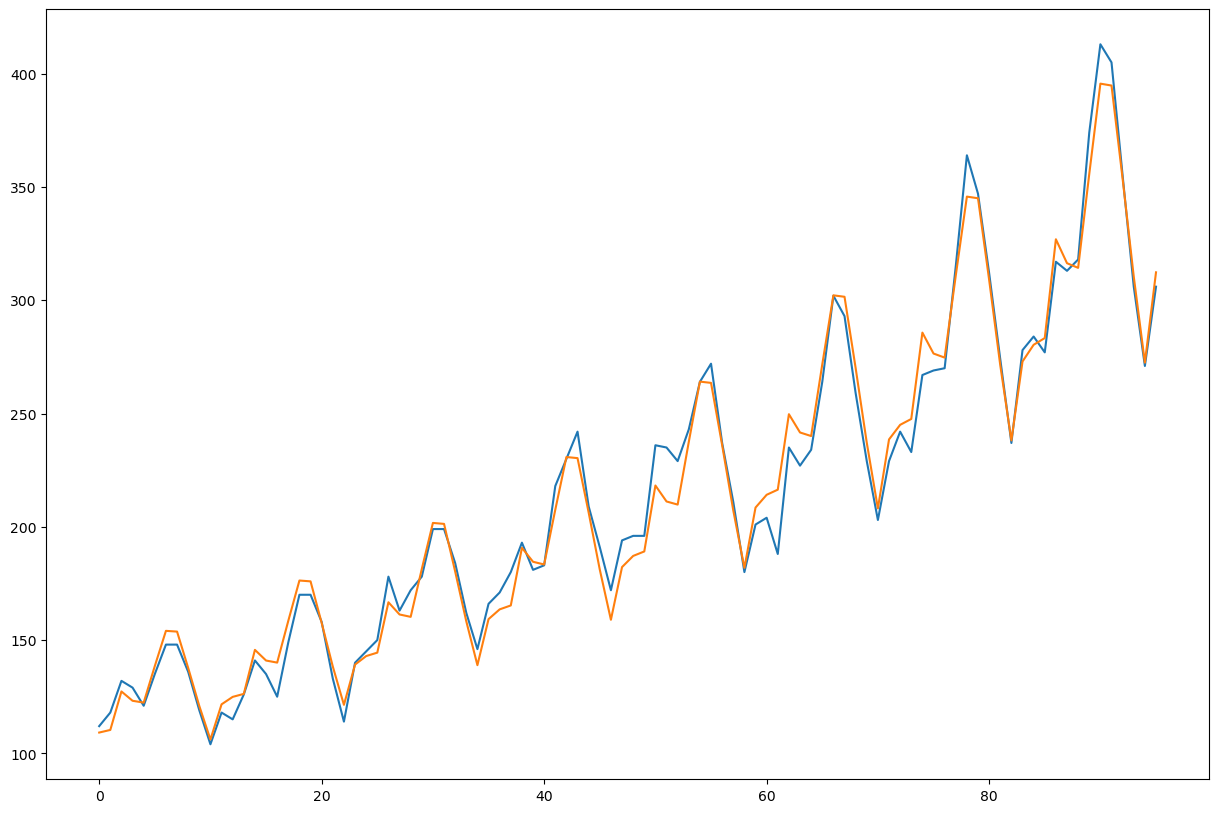

In [80]:
plt.figure(figsize=(15,10))
plt.plot(Airlines[['Passengers','forecasted_Passengers']].reset_index(drop=True))

# Splitting Data

In [81]:
Airlines=pd.read_excel("Airlines+Data.xlsx")
Train = Airlines.head(84)
Test = Airlines.tail(12)

In [82]:
Train

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
79,2001-08-01,347
80,2001-09-01,312
81,2001-10-01,274
82,2001-11-01,237


In [83]:
Test

,Month,Passengers
84,2002-01-01,284
85,2002-02-01,277
86,2002-03-01,317
87,2002-04-01,313
88,2002-05-01,318
89,2002-06-01,374
90,2002-07-01,413
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306


# Moving Average

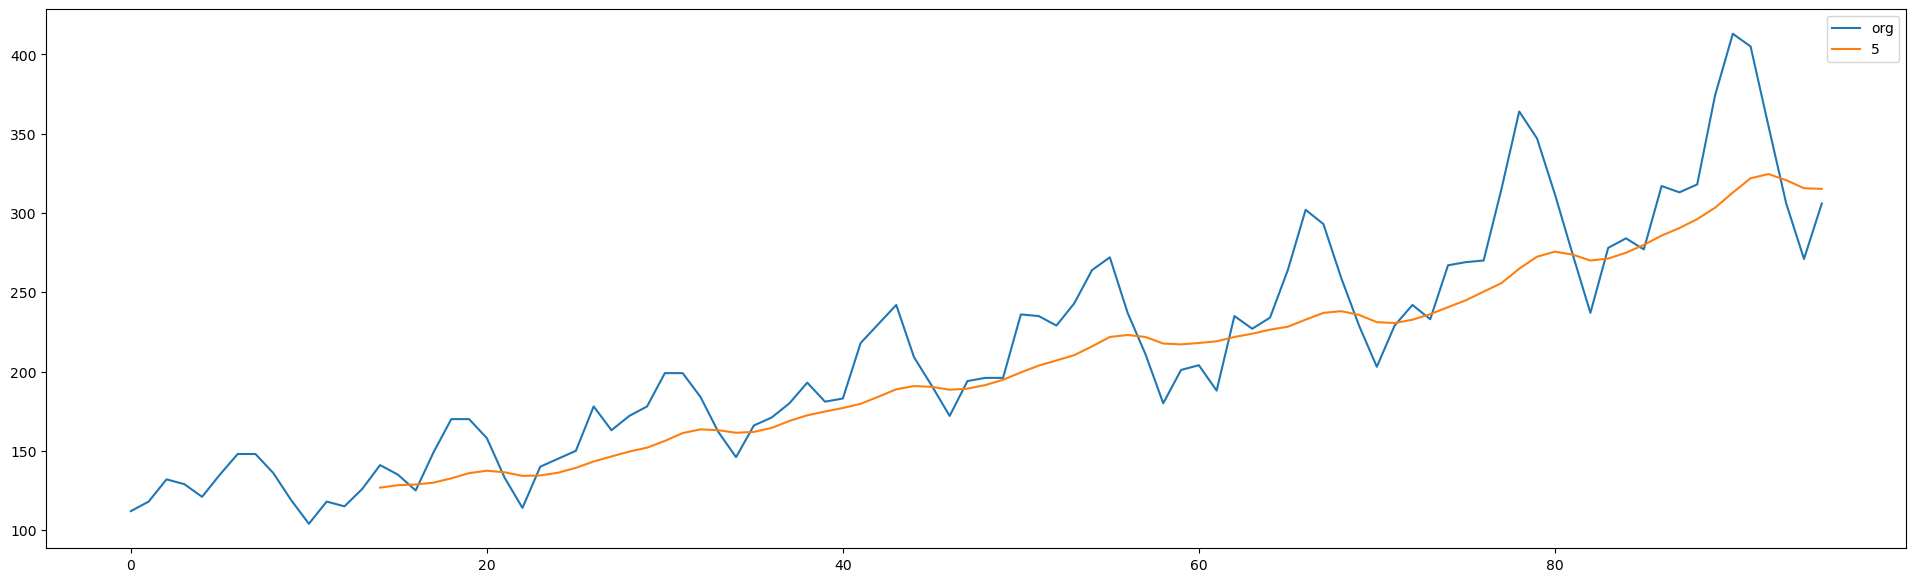

In [84]:
plt.figure(figsize=(24,7))
Airlines['Passengers'].plot(label="org")
Airlines["Passengers"].rolling(15).mean().plot(label=str(5))
plt.legend(loc='best')

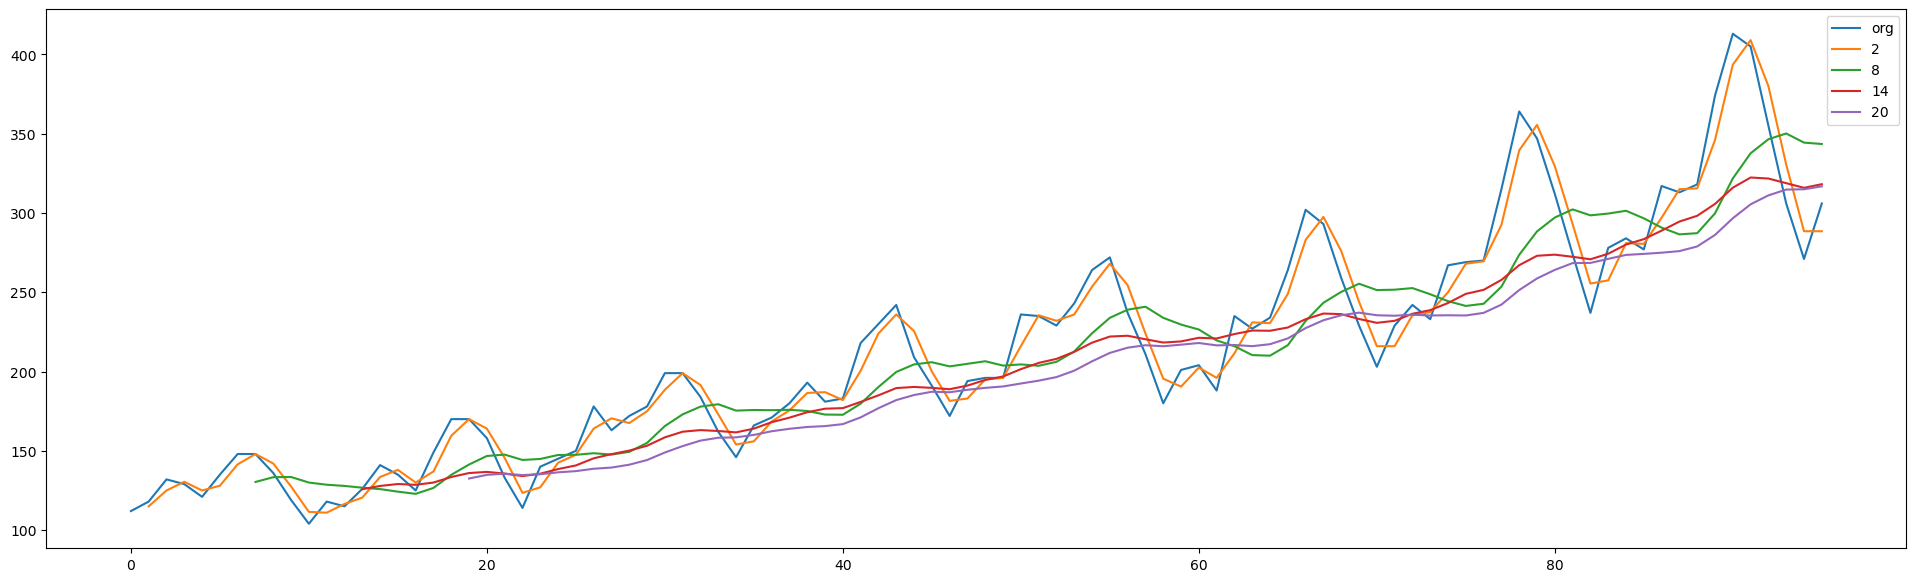

In [85]:
plt.figure(figsize=(24,7))
Airlines['Passengers'].plot(label="org")
for i in range(2,24,6):
    Airlines["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time Series Decomposition Plot

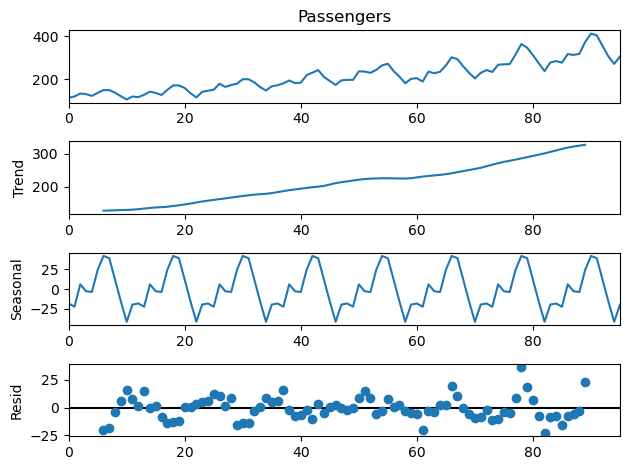

In [86]:
decompose_ts_add = seasonal_decompose(Airlines['Passengers'], period = 12)
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plots

C:\Users\vinod kumar N\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


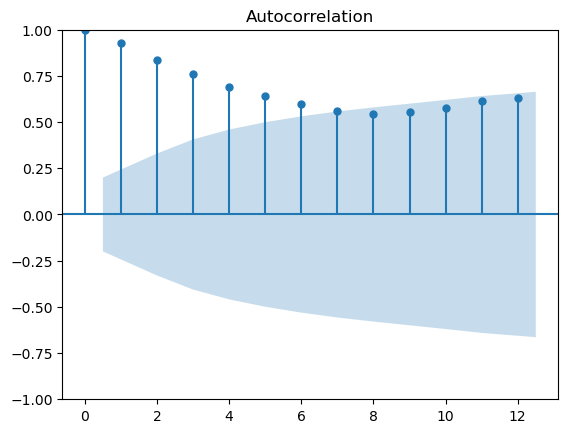

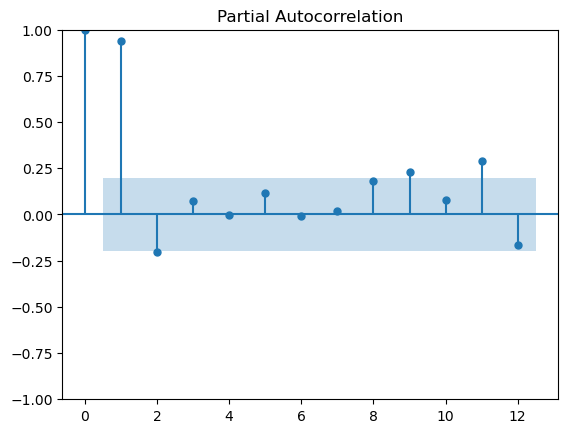

In [87]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Airlines.Passengers,lags=12)
tsa_plots.plot_pacf(Airlines.Passengers,lags=12)
plt.show()

# Evaluation Metric MAPE

In [88]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

# Simple Exponential Method

In [89]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

13.41127474051367

# Holt method

In [90]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\vinod kumar N\AppData\Local\Temp\ipykernel_12504\2579047746.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


23.530719652100505

# Holts Winter Exponential Smoothing with Additive Seasonality and Additive Trend

In [91]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

5.730286880515042

# Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend

In [92]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

2.8210913424868784

# Final Model by Combining Train and Test

In [93]:
hwe_model_mul_add = ExponentialSmoothing(Airlines["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 

In [94]:
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

96     312.899560
97     308.171547
98     355.533060
99     345.770145
100    345.696478
101    392.471215
102    436.501917
103    429.859801
104    380.173448
105    332.317859
106    290.626129
107    330.590939
dtype: float64

# Forecasting using ARIMA model

In [95]:
Airlines=pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)
Airlines

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [96]:
# separate out a validation dataset
split_point = len(Airlines) - 12

dataset, validation = Airlines[0:split_point], Airlines[split_point:]

print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 84, Validation 12


In [97]:
# evaluate a persistence model
# load data
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

C:\Users\vinod kumar N\AppData\Local\Temp\ipykernel_12504\2746187420.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-08-01    347
2001-09-01    312
2001-10-01    274
2001-11-01    237
2001-12-01    278
Name: 1, Length: 84, dtype: int64

In [98]:
# prepare data
X = train.values
X

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278], dtype=int64)

In [99]:
X = X.astype('float32')
X

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278.], dtype=float32)

In [100]:
train_size = int(len(X) * 0.50)
train_size

42

In [101]:
train, test = X[0:train_size], X[train_size:]

In [102]:
train

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218.],
      dtype=float32)

In [103]:
test

array([230., 242., 209., 191., 172., 194., 196., 196., 236., 235., 229.,
       243., 264., 272., 237., 211., 180., 201., 204., 188., 235., 227.,
       234., 264., 302., 293., 259., 229., 203., 229., 242., 233., 267.,
       269., 270., 315., 364., 347., 312., 274., 237., 278.],
      dtype=float32)

In [104]:
# walk-forward validation
history = [x for x in train]
history

[112.0,
 118.0,
 132.0,
 129.0,
 121.0,
 135.0,
 148.0,
 148.0,
 136.0,
 119.0,
 104.0,
 118.0,
 115.0,
 126.0,
 141.0,
 135.0,
 125.0,
 149.0,
 170.0,
 170.0,
 158.0,
 133.0,
 114.0,
 140.0,
 145.0,
 150.0,
 178.0,
 163.0,
 172.0,
 178.0,
 199.0,
 199.0,
 184.0,
 162.0,
 146.0,
 166.0,
 171.0,
 180.0,
 193.0,
 181.0,
 183.0,
 218.0]

# Predictions

In [105]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=218.000, Expected=230.000
>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>

In [106]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 26.029


# ARIMA Hyperparameters

In [107]:
train = Airlines['1990':'2010']
test = Airlines['2011':]

In [108]:
# grid search ARIMA parameters for a time series
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
    
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

# Grid search for p,d,q values

In [109]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    
    best_score, best_cfg = float('inf'), None
    
    for p,d,q in itertools.product(p_values, d_values, q_values):
    #for p in p_values:
    #    for d in d_values:
    #        for q in q_values:
    
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE=%.3f' % (best_cfg, best_score))

In [110]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

C:\Users\vinod kumar N\AppData\Local\Temp\ipykernel_12504\240493752.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
1995-01-01    112
1995-02-01    118
1995-03-01    132
1995-04-01    129
1995-05-01    121
             ... 
2001-08-01    347
2001-09-01    312
2001-10-01    274
2001-11-01    237
2001-12-01    278
Name: 1, Length: 84, dtype: int64

In [111]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

In [112]:
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=78.356
ARIMA(0, 0, 1) RMSE=44.791
ARIMA(0, 0, 2) RMSE=34.740
ARIMA(0, 0, 3) RMSE=29.116
ARIMA(0, 0, 4) RMSE=30.070
ARIMA(0, 1, 0) RMSE=26.029
ARIMA(0, 1, 1) RMSE=25.374
ARIMA(0, 1, 2) RMSE=26.051
ARIMA(0, 1, 3) RMSE=25.943
ARIMA(0, 1, 4) RMSE=24.469
ARIMA(0, 2, 0) RMSE=32.281
ARIMA(0, 2, 1) RMSE=26.206
ARIMA(0, 2, 2) RMSE=25.556
ARIMA(0, 2, 3) RMSE=27.087
ARIMA(0, 2, 4) RMSE=24.274
ARIMA(0, 3, 0) RMSE=49.456
ARIMA(0, 3, 1) RMSE=32.545
ARIMA(0, 3, 2) RMSE=26.721
ARIMA(0, 3, 3) RMSE=26.032
ARIMA(0, 3, 4) RMSE=26.631
ARIMA(0, 4, 0) RMSE=84.509
ARIMA(0, 4, 1) RMSE=49.870
ARIMA(0, 4, 2) RMSE=33.150
ARIMA(0, 4, 3) RMSE=27.916
ARIMA(0, 4, 4) RMSE=31.675
ARIMA(1, 0, 0) RMSE=26.447
ARIMA(1, 0, 1) RMSE=25.615
ARIMA(1, 0, 2) RMSE=26.125
ARIMA(1, 0, 3) RMSE=28.050
ARIMA(1, 0, 4) RMSE=25.579
ARIMA(1, 1, 0) RMSE=25.723
ARIMA(1, 1, 1) RMSE=25.457
ARIMA(1, 1, 2) RMSE=24.457
ARIMA(1, 1, 3) RMSE=24.800
ARIMA(1, 1, 4) RMSE=24.548
ARIMA(1, 2, 0) RMSE=31.529
ARIMA(1, 2, 1) RMSE=25.927
A

# Build Model based on the Optimized Values

In [113]:
# save finalized model to file
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
train

,112
1995-01-01,
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
1995-06-01,135
...,...
2001-08-01,347
2001-09-01,312
2001-10-01,274


In [114]:
# prepare Data
X = train.values
X = X.astype('float32')

In [115]:
# fit model
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 12)
forecast

array([285.42245122, 286.31494511, 301.74496948, 309.57706921,
       322.47894879, 325.55187365, 328.29645833, 322.59462848,
       316.87292519, 307.51890195, 301.28114362, 295.99015647])

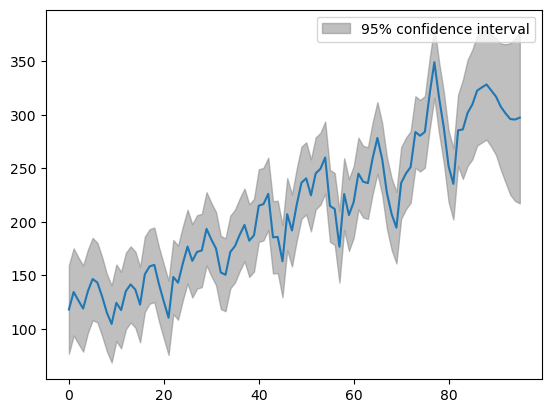

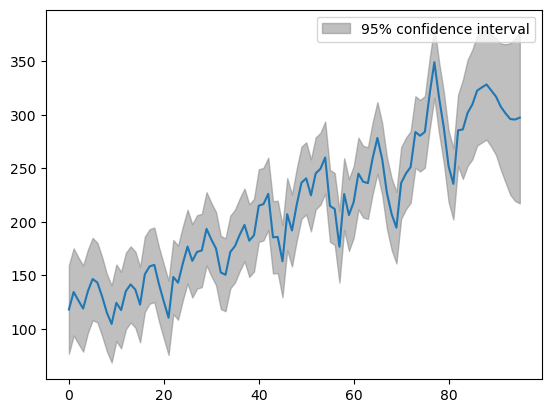

In [116]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)
#model_fit.plot_predict(1, 96)

In [117]:
#Error on the test data
val = pd.read_csv('validation.csv', header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

39.93637299964841

# Combine train and test data and build Final model

In [118]:
# fit model
Airlines=pd.read_excel("Airlines+Data.xlsx",header=0, index_col=0, parse_dates=True)

# prepare data
X = train.values
X = X.astype('float32')

In [119]:
model = ARIMA(X, order=(3,1,3))
model_fit = model.fit()

In [120]:
forecast=model_fit.forecast(steps=12)
forecast

array([285.42245122, 286.31494511, 301.74496948, 309.57706921,
       322.47894879, 325.55187365, 328.29645833, 322.59462848,
       316.87292519, 307.51890195, 301.28114362, 295.99015647])

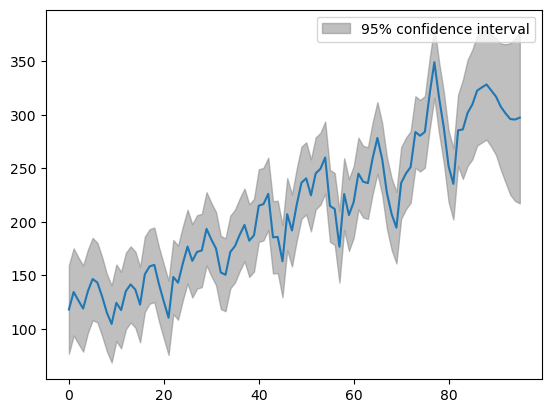

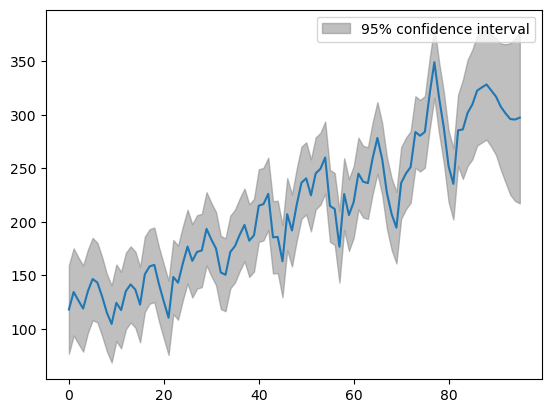

In [121]:
#model_fit.plot_predict(1,90)
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,96)

# Comparing above Models the Holts Winter Exponential Smoothing with Multiplicative Seasonality and Additive Trend gives minimum error i.e 2.82